# Simple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [4]:
rooms = 2*np.random.randn(100,1)+3
rooms[1:10]

array([[5.75236175],
       [3.37033427],
       [5.26697734],
       [3.68494568],
       [3.91696355],
       [6.10970014],
       [6.26423592],
       [6.08429074],
       [3.8986155 ]])

In [5]:
price = 265 + 6*rooms + abs(np.random.randn(100,1))
price[1:10]

array([[299.60981872],
       [286.66614417],
       [297.22268723],
       [288.95868296],
       [289.22281319],
       [301.91865568],
       [303.55743853],
       [302.76240121],
       [289.41482354]])

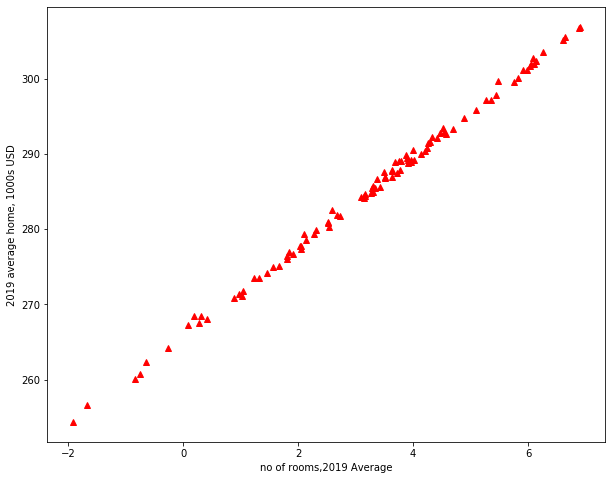

In [6]:
plt.plot(rooms,price,'r^')
plt.xlabel("no of rooms,2019 Average")
plt.ylabel("2019 average home, 1000s USD")
plt.show()

In [7]:
X = rooms
Y = price

LinReg = LinearRegression()
LinReg.fit(X,Y)
print(LinReg.intercept_,LinReg.coef_)

[265.82991815] [[5.95818672]]


In [8]:
print(LinReg.score(X,Y))

0.9980820263016716


In [9]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [12]:
address = 'C:/Users/Priya Bhatia/OneDrive/Machine Learning Andrew Course/enrollment_forecast.csv'

In [13]:
enroll = pd.read_csv(address)
enroll.head(15)

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112
5,6,9369,6.4,15265,2192
6,7,9920,6.5,15484,2235
7,8,10167,6.4,15723,2351
8,9,11084,6.3,16501,2411
9,10,12504,7.7,16890,2475


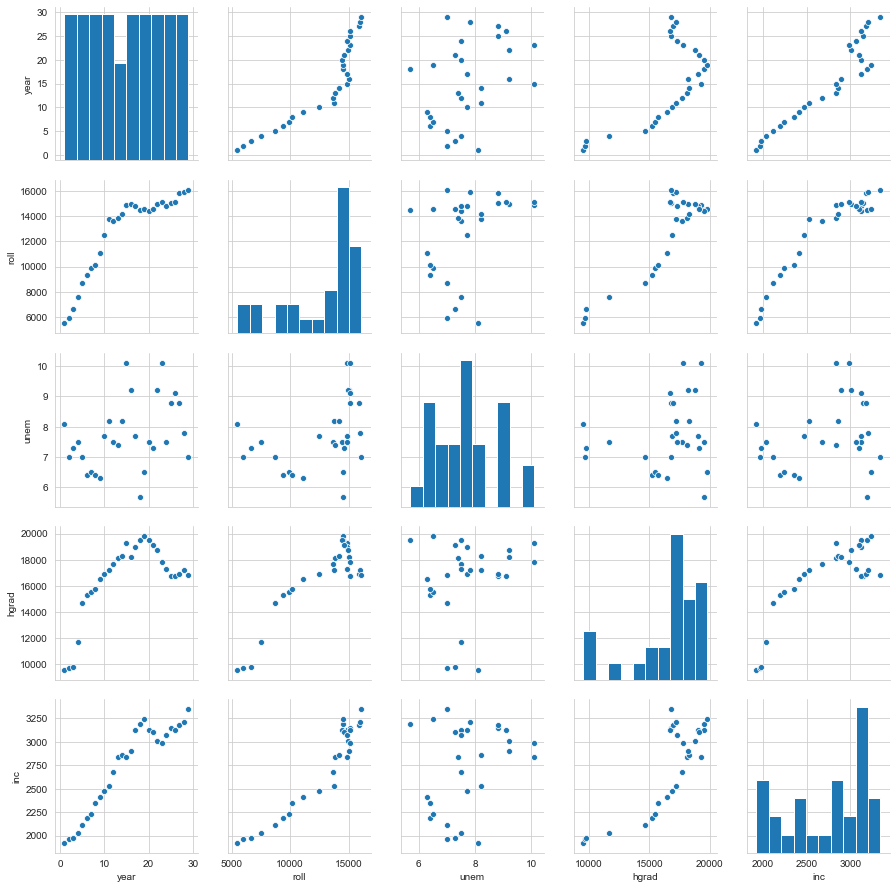

In [15]:
sb.pairplot(enroll)

In [16]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [17]:
enroll_data = enroll[['unem','hgrad']].values
enroll_target = enroll[['roll']].values

enroll_data_names = ['unem','hgrad']
X, y = scale(enroll_data),enroll_target

In [18]:
missing_values = X == np.NAN
X[missing_values == True]

array([], dtype=float64)

In [19]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X,y)

print(LinReg.score(X,y))

0.8488812666133723
